# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Load Dataset

In [2]:
df = pd.read_csv('FMCG_Sales_Data_2022_2024.csv')
df

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190752,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-North,Single,2.55,0,2,190,163,25
190753,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-South,Single,6.01,0,5,141,131,19
190754,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-Central,Single,3.45,0,5,0,132,0
190755,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-North,Multipack,1.93,1,2,211,201,40


## Check The Dataset

In [3]:
df.shape

(190757, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190757 entries, 0 to 190756
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             190757 non-null  object 
 1   sku              190757 non-null  object 
 2   brand            190757 non-null  object 
 3   segment          190757 non-null  object 
 4   category         190757 non-null  object 
 5   channel          190757 non-null  object 
 6   region           190757 non-null  object 
 7   pack_type        190757 non-null  object 
 8   price_unit       190757 non-null  float64
 9   promotion_flag   190757 non-null  int64  
 10  delivery_days    190757 non-null  int64  
 11  stock_available  190757 non-null  int64  
 12  delivered_qty    190757 non-null  int64  
 13  units_sold       190757 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 20.4+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price_unit,190757.0,5.251979,2.166705,1.5,3.38,5.25,7.13,9.0
promotion_flag,190757.0,0.149200,0.356287,0.0,0.00,0.00,0.00,1.0
delivery_days,190757.0,3.004860,1.414626,1.0,2.00,3.00,4.00,5.0
stock_available,190757.0,157.697652,52.736104,-12.0,124.00,155.00,192.00,405.0
delivered_qty,190757.0,179.333655,40.037475,-11.0,152.00,179.00,206.00,366.0
units_sold,190757.0,19.919709,11.770077,-25.0,12.00,18.00,25.00,139.0


In [6]:
df.sample

<bound method NDFrame.sample of               date     sku     brand        segment  category     channel  \
0       2022-01-21  MI-006  MiBrand1      Milk-Seg3      Milk      Retail   
1       2022-01-21  MI-006  MiBrand1      Milk-Seg3      Milk      Retail   
2       2022-01-21  MI-006  MiBrand1      Milk-Seg3      Milk      Retail   
3       2022-01-21  MI-006  MiBrand1      Milk-Seg3      Milk    Discount   
4       2022-01-21  MI-006  MiBrand1      Milk-Seg3      Milk    Discount   
...            ...     ...       ...            ...       ...         ...   
190752  2024-12-31  SN-030  SnBrand2  SnackBar-Seg1  SnackBar    Discount   
190753  2024-12-31  SN-030  SnBrand2  SnackBar-Seg1  SnackBar    Discount   
190754  2024-12-31  SN-030  SnBrand2  SnackBar-Seg1  SnackBar  E-commerce   
190755  2024-12-31  SN-030  SnBrand2  SnackBar-Seg1  SnackBar  E-commerce   
190756  2024-12-31  SN-030  SnBrand2  SnackBar-Seg1  SnackBar  E-commerce   

            region  pack_type  price_unit  

In [7]:
df.nunique()

date               1076
sku                  30
brand                14
segment              13
category              5
channel               3
region                3
pack_type             3
price_unit          751
promotion_flag        2
delivery_days         5
stock_available     355
delivered_qty       321
units_sold          135
dtype: int64

## Exploratory Data Analysis

In [8]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [9]:
df.isna().sum()

date               0
sku                0
brand              0
segment            0
category           0
channel            0
region             0
pack_type          0
price_unit         0
promotion_flag     0
delivery_days      0
stock_available    0
delivered_qty      0
units_sold         0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.fillna(0, inplace=True)

In [12]:
df

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190752,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-North,Single,2.55,0,2,190,163,25
190753,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-South,Single,6.01,0,5,141,131,19
190754,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-Central,Single,3.45,0,5,0,132,0
190755,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-North,Multipack,1.93,1,2,211,201,40


In [13]:
print('Columns in the dataset:')
print(df.columns.tolist())

Columns in the dataset:
['date', 'sku', 'brand', 'segment', 'category', 'channel', 'region', 'pack_type', 'price_unit', 'promotion_flag', 'delivery_days', 'stock_available', 'delivered_qty', 'units_sold']


In [14]:
num_cols = ['price_unit', 'promotion_flag', 'delivery_days', 'stock_available', 'delivered_qty', 'units_sold']
cat_cols = ['brand', 'segment', 'category', 'channel', 'region', 'pack_type']

print(len(num_cols))
print(len(cat_cols))

6
6


## Visualization

### 1. Histogram Of Num_Cols

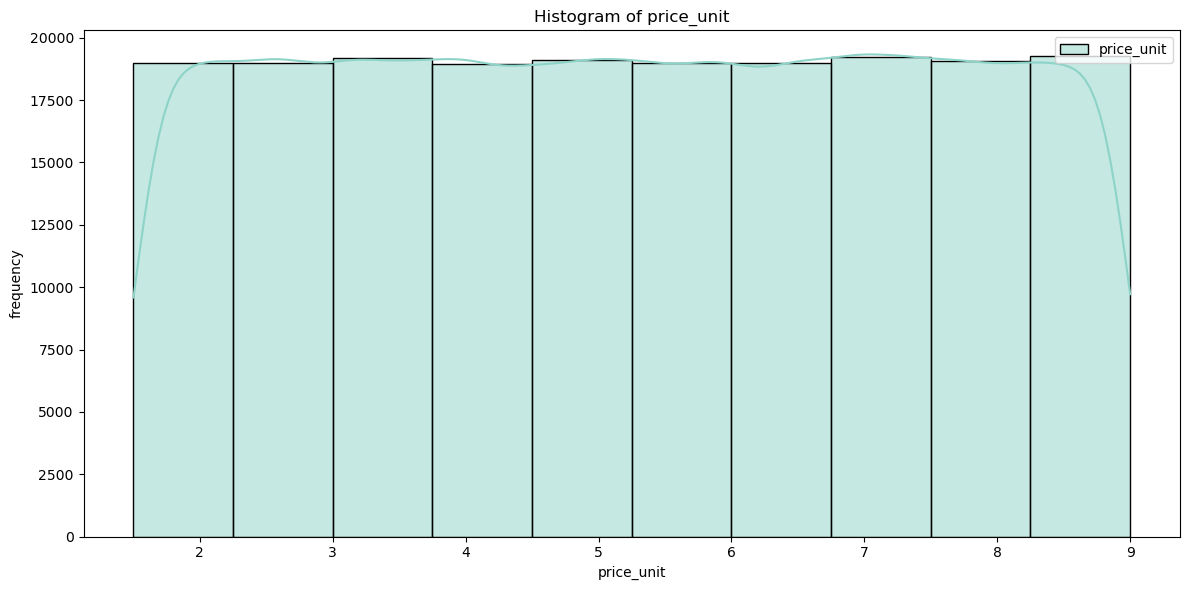

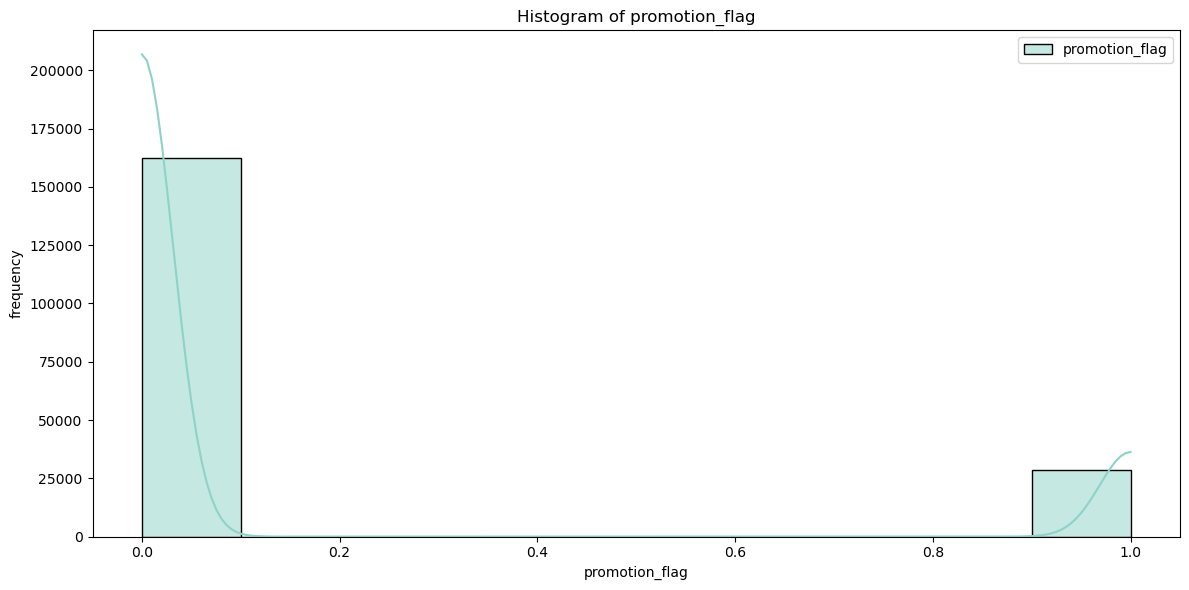

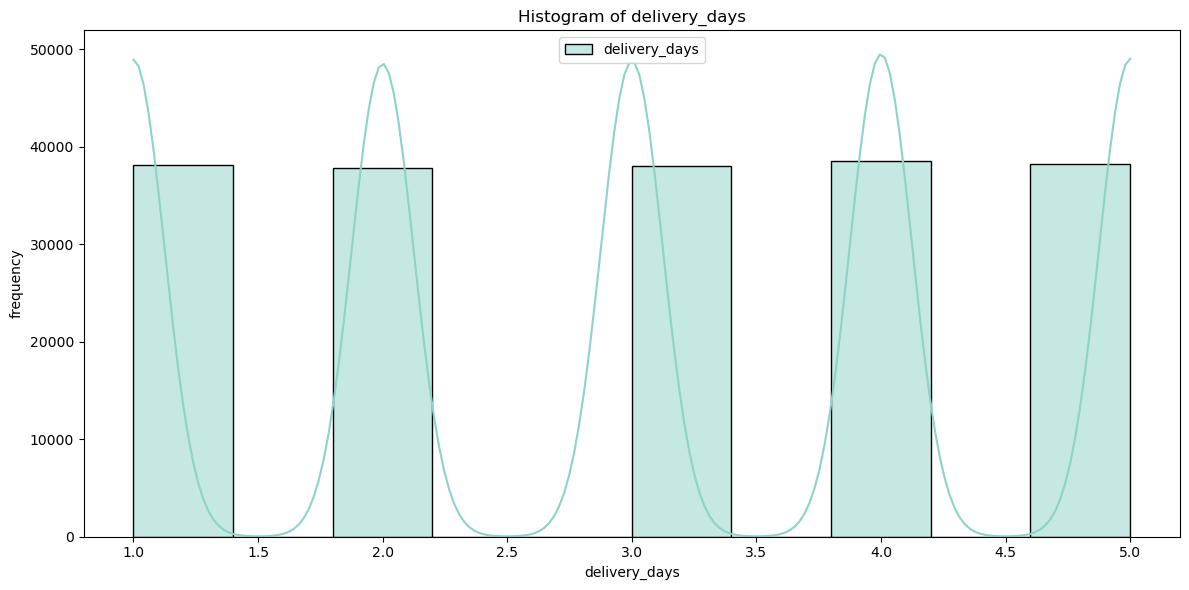

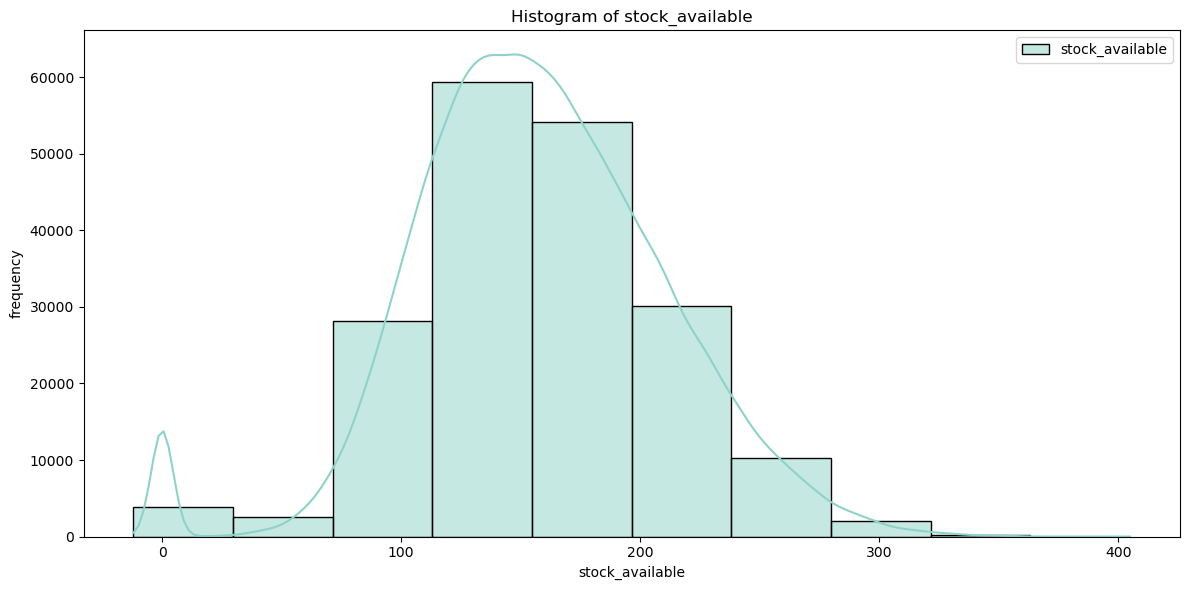

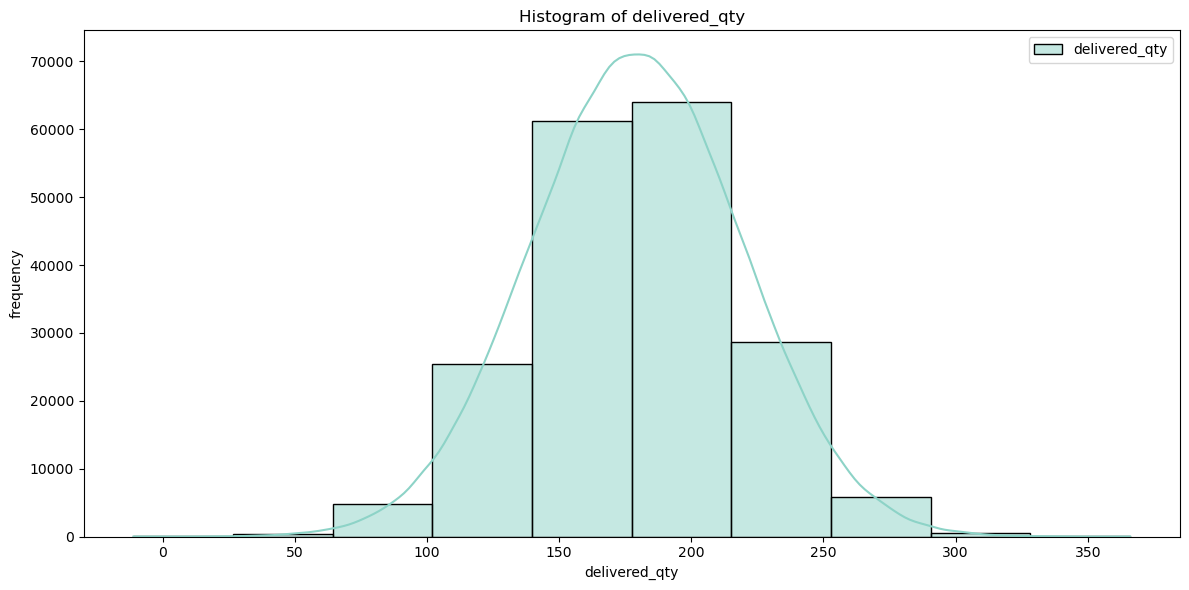

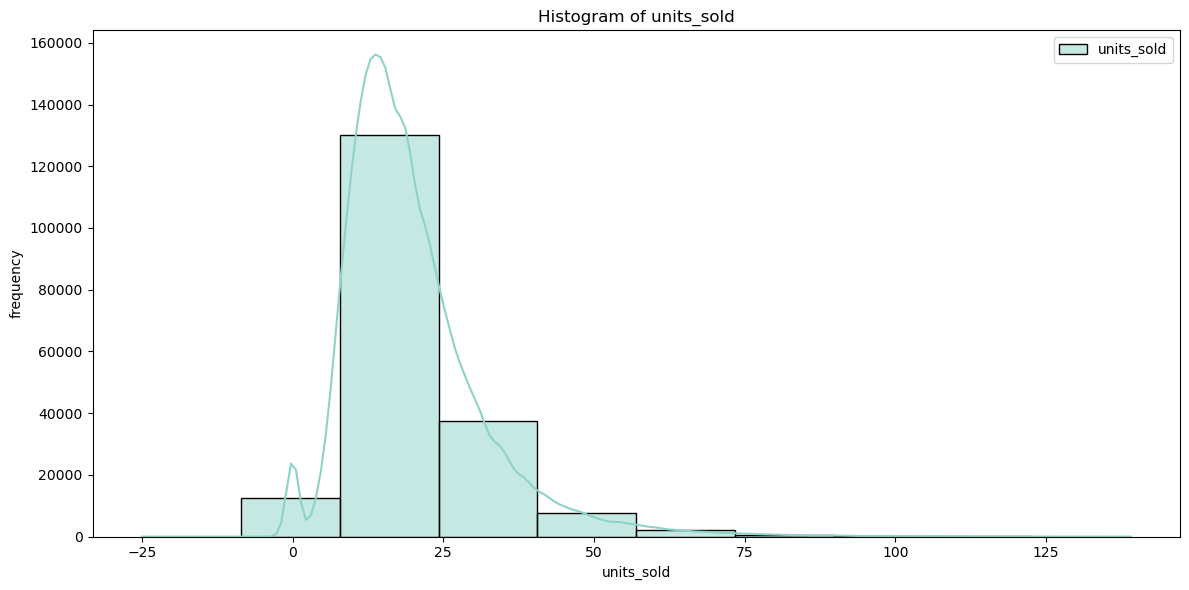

In [15]:
for col in num_cols:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[[col]], kde=True, palette='Set3', bins=10)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.tight_layout()
    plt.show()

### 2. Countplot Of Cat_Cols

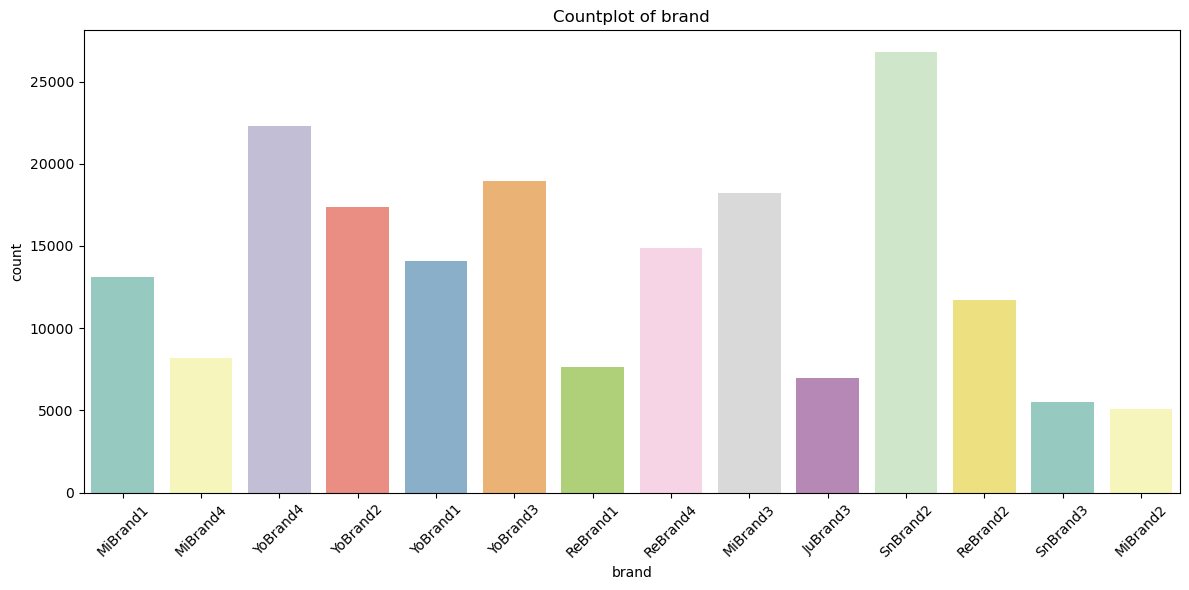

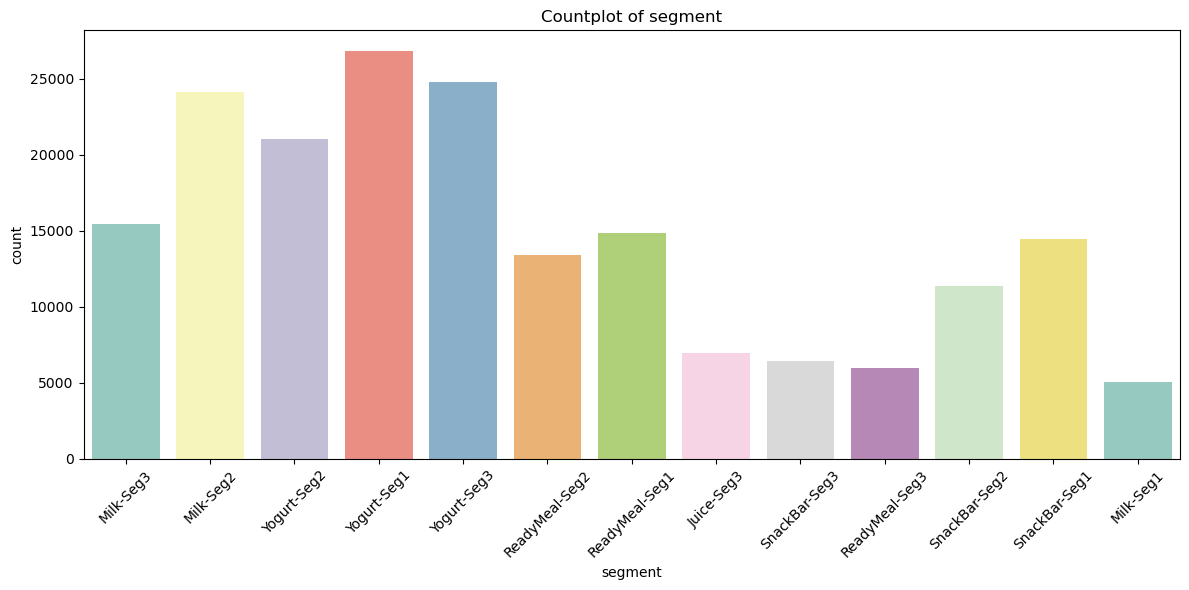

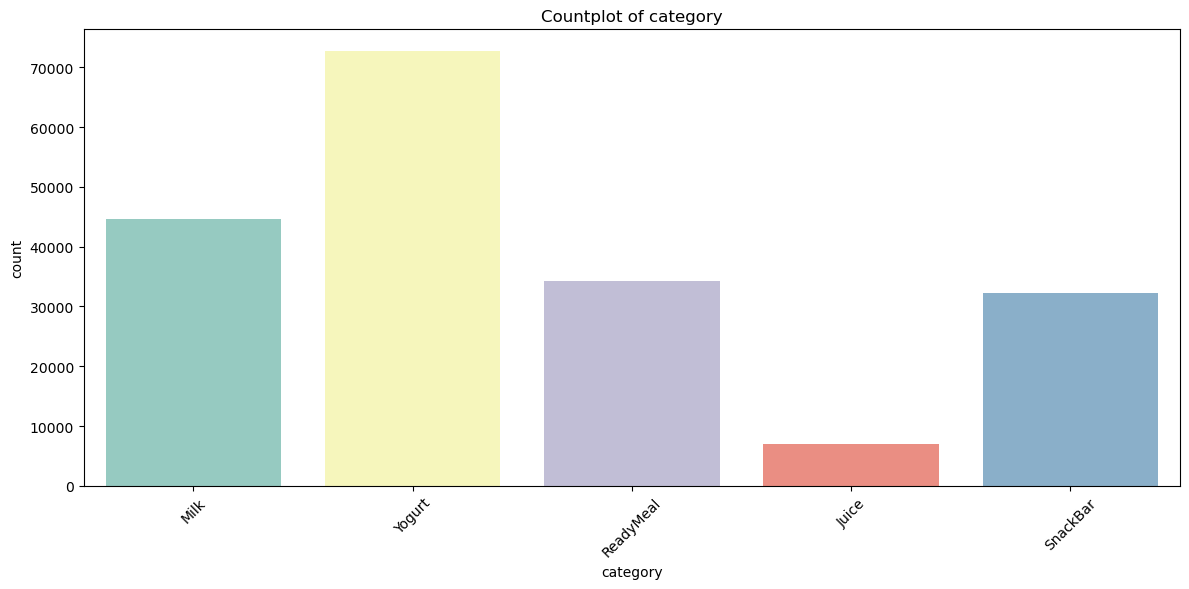

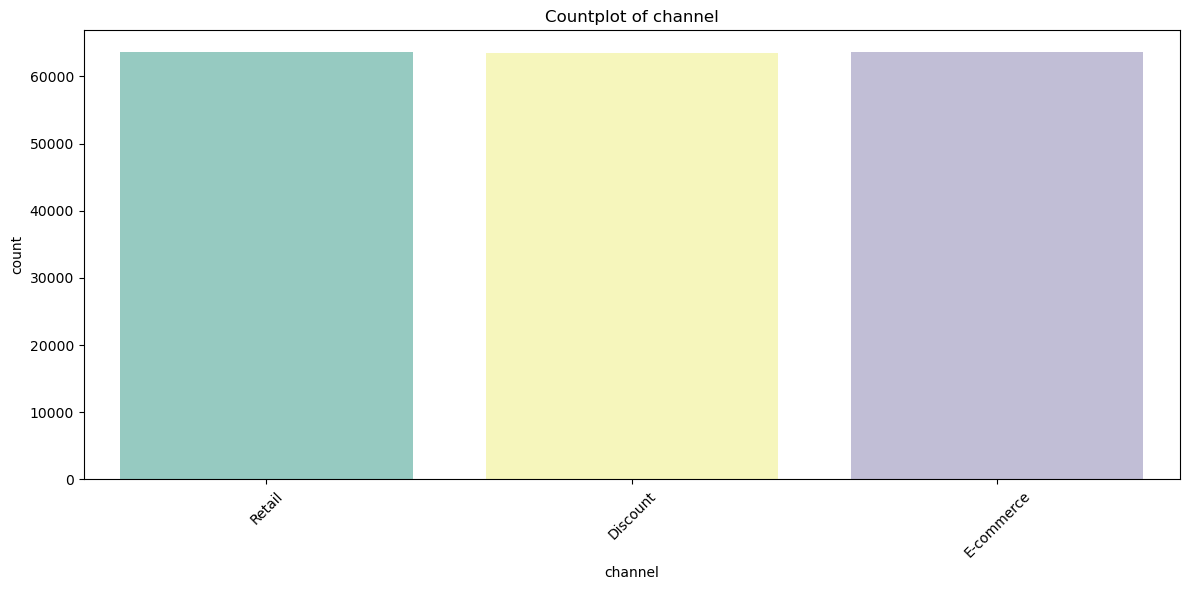

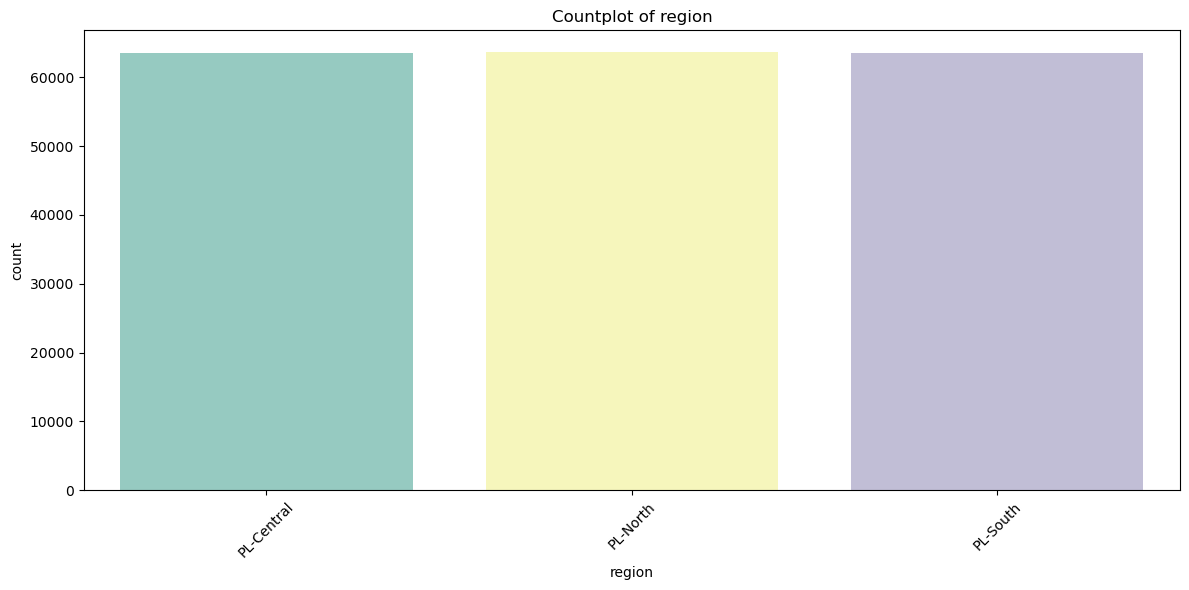

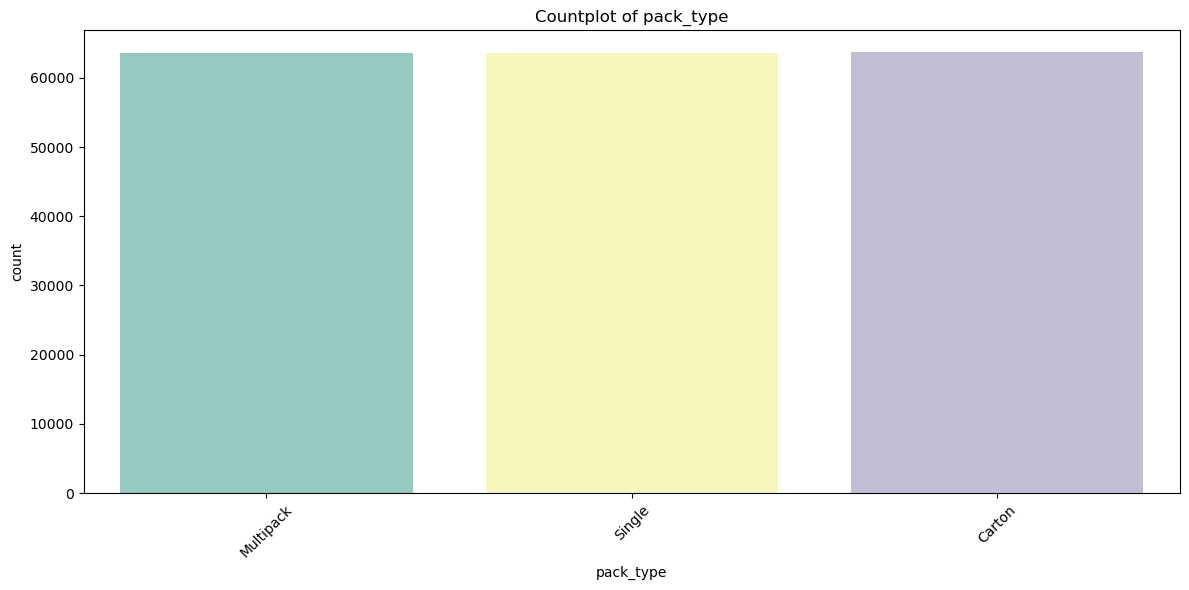

In [16]:
for col in cat_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=col, palette='Set3')
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 3. Units Sold vs Price Unit by Promotional Flag

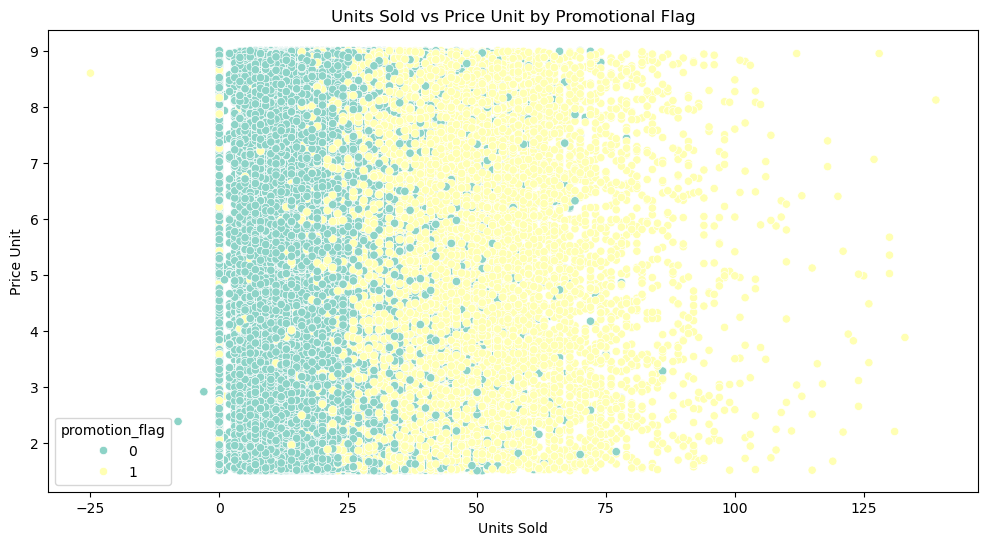

In [17]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['units_sold'], y=df['price_unit'], hue=df['promotion_flag'], palette='Set3')
plt.title('Units Sold vs Price Unit by Promotional Flag')
plt.xlabel('Units Sold')
plt.ylabel('Price Unit')
plt.show()

### 4. Category by Price Unit

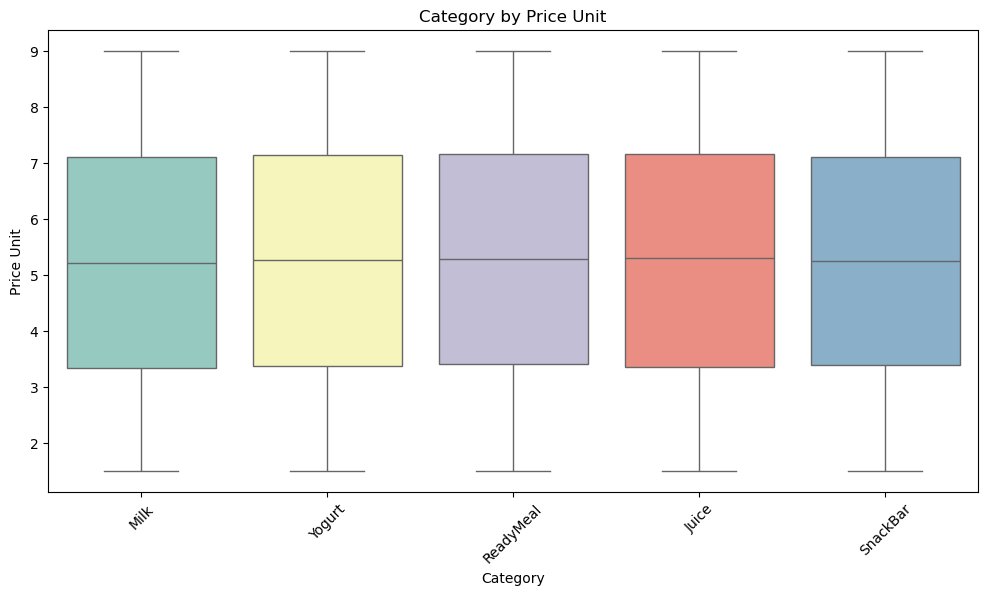

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['category'], y=df['price_unit'], data=df, palette='Set3')
plt.title('Category by Price Unit')
plt.xlabel('Category')
plt.ylabel('Price Unit')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### 5. Brands by Category

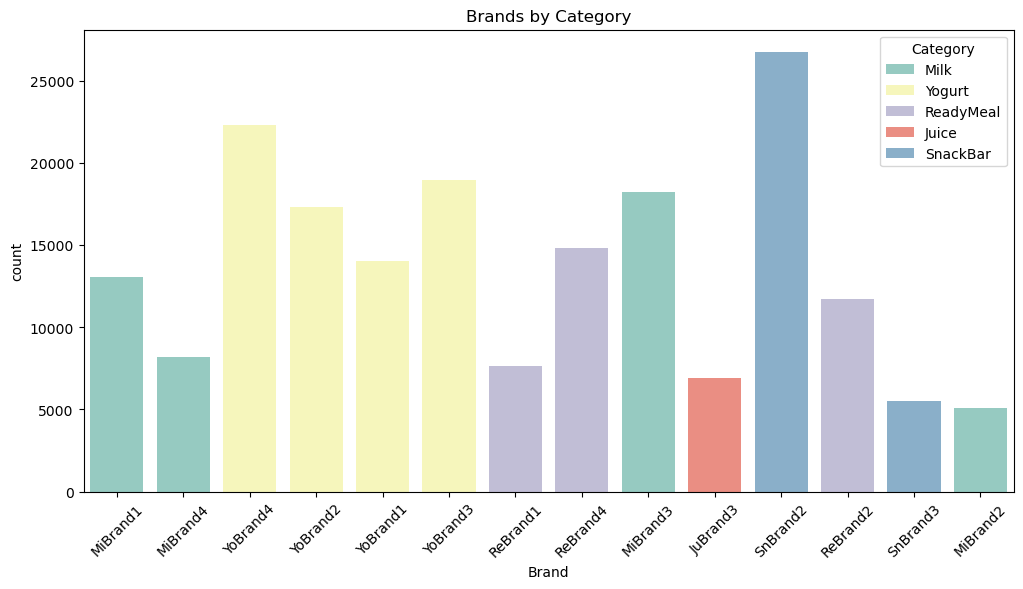

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['brand'], hue=df['category'], palette='Set3')
plt.title('Brands by Category')
plt.xlabel('Brand')
plt.ylabel('count')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Category')
plt.show()

### 6. Units Sold by Date

In [20]:
df['month'] = df['date'].dt.month_name()
df['month']

0          January
1          January
2          January
3          January
4          January
            ...   
190752    December
190753    December
190754    December
190755    December
190756    December
Name: month, Length: 190757, dtype: object

In [21]:
df['week'] = df['date'].dt.day_name()
df['week']

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
190752    Tuesday
190753    Tuesday
190754    Tuesday
190755    Tuesday
190756    Tuesday
Name: week, Length: 190757, dtype: object

#### 6.1. Sales By Weekday

In [22]:
weekday_units_sold = df.groupby('week')['units_sold'].sum()

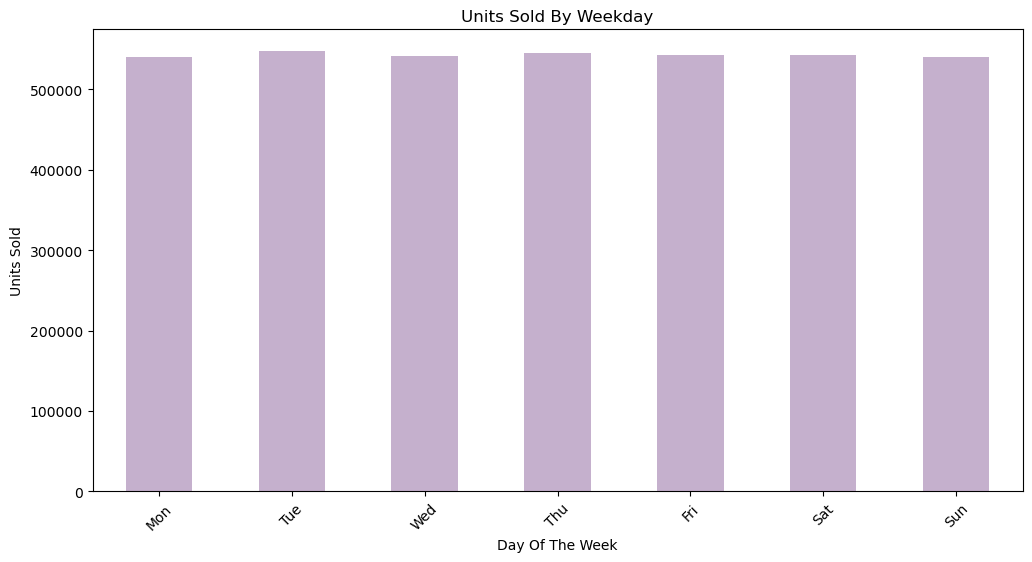

In [23]:
weekday_units_sold.plot(kind='bar', color='#C5B0CD', figsize=(12, 6))
plt.title('Units Sold By Weekday')
plt.xlabel('Day Of The Week')
plt.ylabel('Units Sold')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.show()

#### 6.1. Sales By Month

In [24]:
monthly_units_sold = df.groupby('month')['units_sold'].sum()

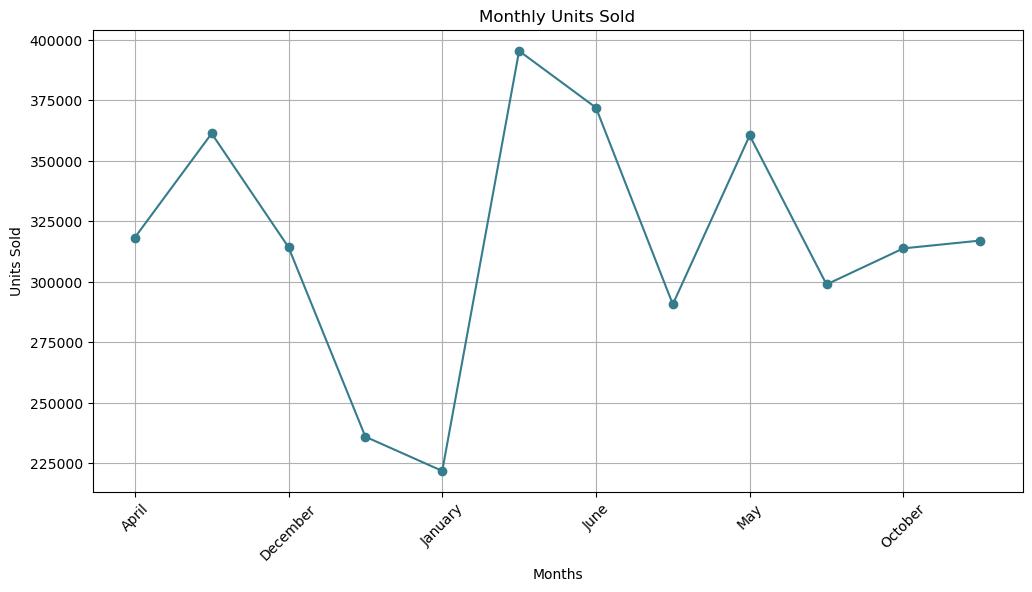

In [25]:
monthly_units_sold.plot(kind='line', marker='o', color='#357C8C', figsize=(12, 6))
plt.title('Monthly Units Sold')
plt.xlabel('Months')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 7. Top Units Sold by Segment

In [26]:
top_units_sold = df.groupby('segment')['units_sold'].sum().sort_values(ascending=False).head(10)
top_units_sold

segment
Yogurt-Seg1       567840
Yogurt-Seg3       528536
Yogurt-Seg2       470206
Milk-Seg2         420953
SnackBar-Seg1     307030
ReadyMeal-Seg1    291239
Milk-Seg3         266247
ReadyMeal-Seg2    265911
SnackBar-Seg2     224909
Juice-Seg3        124349
Name: units_sold, dtype: int64

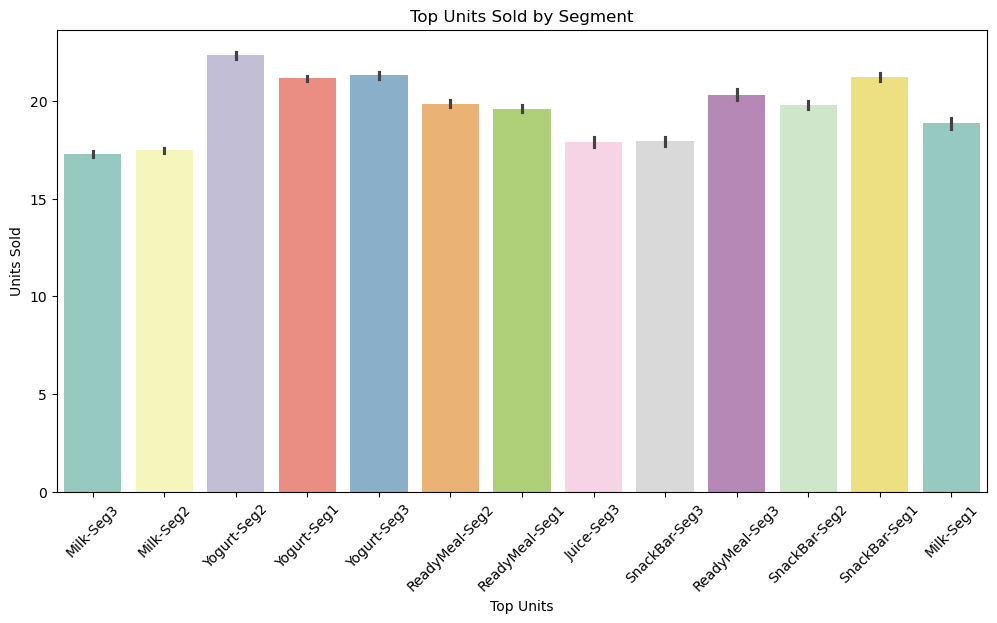

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['segment'], y=df['units_sold'], palette='Set3')
plt.title('Top Units Sold by Segment')
plt.xlabel('Top Units')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.show()

### 8. Pack Type

In [28]:
pack_type = df['pack_type'].value_counts()

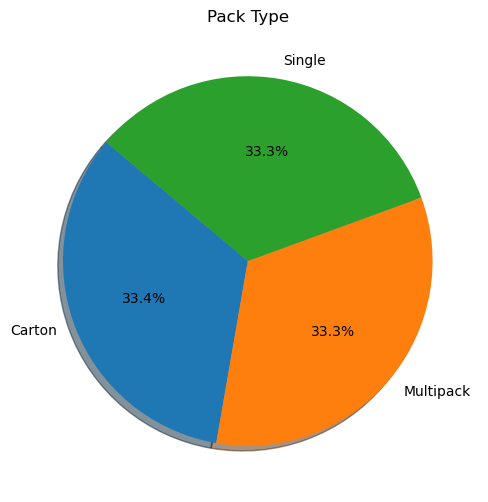

In [29]:
plt.figure(figsize=(12, 6))
plt.pie(pack_type, labels=pack_type.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Pack Type')
plt.show()

### 9. Stock Available vs Delivered Quantity

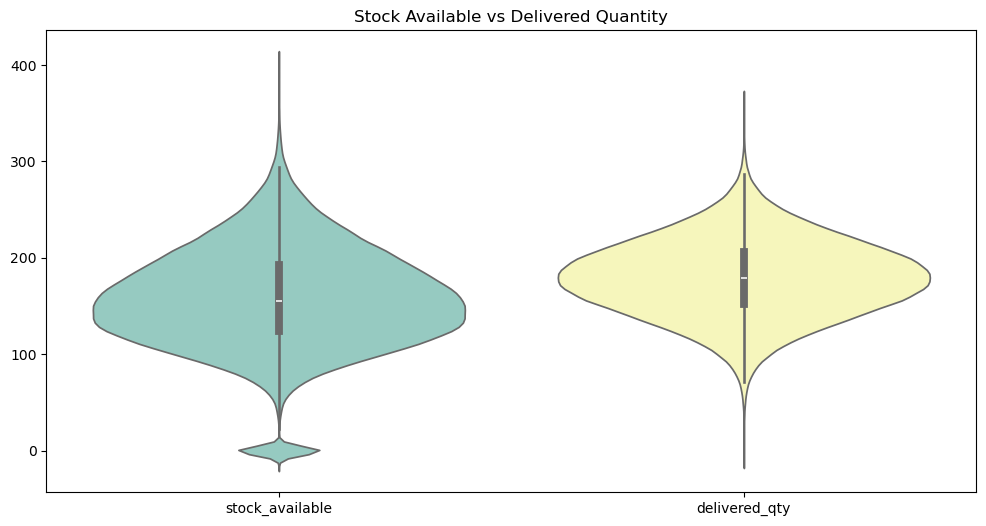

In [30]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[['stock_available','delivered_qty']], palette='Set3')
plt.title('Stock Available vs Delivered Quantity')
plt.show()

### 10. Correlation Heat Map

In [31]:
df

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold,month,week
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9,January,Friday
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0,January,Friday
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8,January,Friday
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7,January,Friday
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12,January,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190752,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-North,Single,2.55,0,2,190,163,25,December,Tuesday
190753,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-South,Single,6.01,0,5,141,131,19,December,Tuesday
190754,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-Central,Single,3.45,0,5,0,132,0,December,Tuesday
190755,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-North,Multipack,1.93,1,2,211,201,40,December,Tuesday


In [32]:
df['brand'].unique()

array(['MiBrand1', 'MiBrand4', 'YoBrand4', 'YoBrand2', 'YoBrand1',
       'YoBrand3', 'ReBrand1', 'ReBrand4', 'MiBrand3', 'JuBrand3',
       'SnBrand2', 'ReBrand2', 'SnBrand3', 'MiBrand2'], dtype=object)

In [33]:
df['segment'].unique()

array(['Milk-Seg3', 'Milk-Seg2', 'Yogurt-Seg2', 'Yogurt-Seg1',
       'Yogurt-Seg3', 'ReadyMeal-Seg2', 'ReadyMeal-Seg1', 'Juice-Seg3',
       'SnackBar-Seg3', 'ReadyMeal-Seg3', 'SnackBar-Seg2',
       'SnackBar-Seg1', 'Milk-Seg1'], dtype=object)

In [34]:
df['category'].unique()

array(['Milk', 'Yogurt', 'ReadyMeal', 'Juice', 'SnackBar'], dtype=object)

In [35]:
df['channel'].unique()

array(['Retail', 'Discount', 'E-commerce'], dtype=object)

In [36]:
df['region'].unique()

array(['PL-Central', 'PL-North', 'PL-South'], dtype=object)

In [37]:
df['pack_type'].unique()

array(['Multipack', 'Single', 'Carton'], dtype=object)

In [39]:
df

In [38]:
df = df.drop(columns=['brand', 'segment'], inplace=True)
df